<a href="https://colab.research.google.com/github/mbenaventev/sevot/blob/main/ModeloRandomForest_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_.e2xlsx.csv')

# Define the feature and target variables
X = df[['plana_a-UNION.INVERTER3.2.TEMPERATUREHEATSINK', 'plana_a.Meteo.Average Irradiance Piranometer', 'plana_a-UNION.INVERTER3.2.ACTIVEPOWER']]
y = df['plana_a-UNION.INVERTER3.2.TEMPERATUREHEATSINK']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Use the model to predict anomalies
def predict_anomalies(X_new):
    y_pred = model.predict(X_new)
    return y_pred

# Example usage:
new_data = pd.DataFrame({'plana_a-UNION.INVERTER3.2.TEMPERATUREHEATSINK': [30, 40, 50],
                         'plana_a.Meteo.Average Irradiance Piranometer': [100, 200, 300],
                         'plana_a-UNION.INVERTER3.2.ACTIVEPOWER': [10, 20, 30]})
anomaly_predictions = predict_anomalies(new_data)
print(anomaly_predictions)

Mean Squared Error: 0.00
[55.01821377 55.0106496  55.0108575 ]


R^2 Score: 1.00


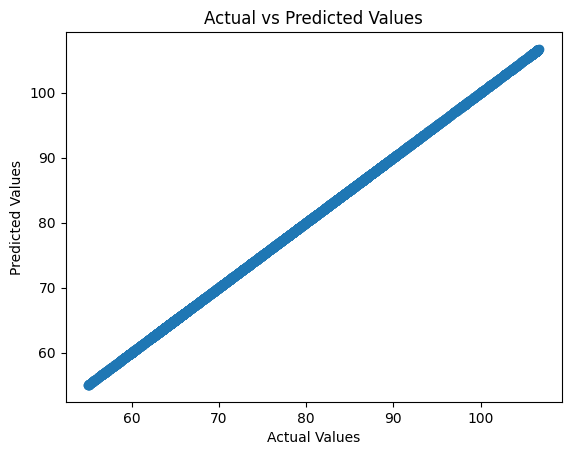

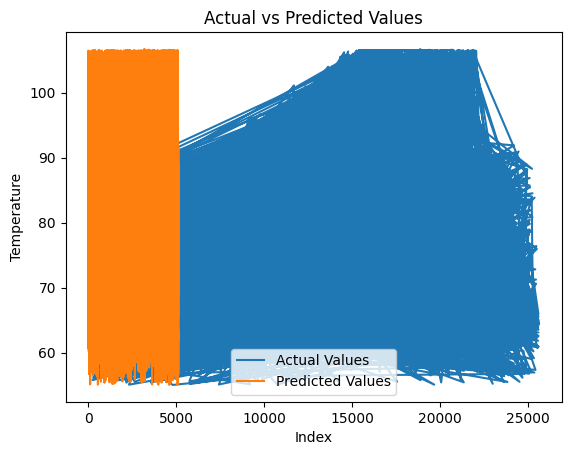

In [ ]:
# prompt: interpreta el resultado de rendimiento del modelo anterior y crea una gráfica para visualizar el resultado

# Calculate the R^2 score
r2_score = model.score(X_test, y_test)
print(f'R^2 Score: {r2_score:.2f}')

# Create a scatter plot of the actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Create a line plot of the actual and predicted values
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
